<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [247]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
import warnings
warnings.filterwarnings('ignore')

#### Load the csv file

In [248]:
df1=pd.read_csv('Heart_disease.csv')
df1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [249]:
df1.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CVD                  0
dtype: int64

In [250]:
df1.shape

(4240, 16)

In [251]:
df1=df1.fillna(method='ffill')
df1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

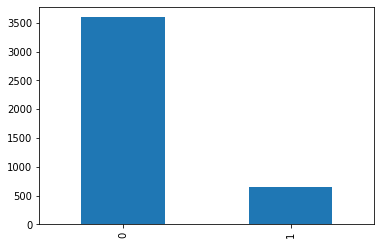

In [252]:
df1['CVD'].value_counts().plot(kind='bar')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [253]:
import statsmodels.api as sm

In [254]:
y=df1['CVD']
x=df1[['diaBP','sysBP','BPMeds']]
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.404151
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4236
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                 0.05122
Time:                        20:23:27   Log-Likelihood:                -1713.6
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.314e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6017      0.305    -15.085      0.000      -5.200      -4.004
diaBP         -0.0108      0.005     -1.987      0.047      -0.021      -0.000
sysBP          0.0277      0.003      9.572      0.000       0.022       0.033
BPMeds         0.3113      0.212      1.471      0.141      -0.103       0.726
==============================================================================
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [255]:
x=df1[['male','currentSmoker','prevalentStroke','prevalentHyp','diabetes','BPMeds']]
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.402959
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                 0.05402
Time:                        20:23:27   Log-Likelihood:                -1708.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 2.077e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.4472      0.087    -28.055      0.000      -2.618      -2.276
male                0.4886      0.090      5.413      0.000       0.312       0.666
currentSmoker       0.1516      0.091      1.668      0.095      -0.027       0.330
prevalentStroke     1.0729      0.423      2.535      0.011       0.243       1.902
prevalentHyp        0.9164      0.092      9.983      0.000       0.737       1.096
diabetes            1.0459      0.210      4.976      0.000       0.634       1.458
BPMeds              0.4674      0.208      2.247      0.025       0.060       0.875
===================================================================================
"""

In [256]:
xc1=list(xc.columns)
xc1.remove('currentSmoker')
xc=xc[xc1]
xc.head()

,const,male,prevalentStroke,prevalentHyp,diabetes,BPMeds
0,1.0,1,0,0,0,0.0
1,1.0,0,0,0,0,0.0
2,1.0,1,0,0,0,0.0
3,1.0,0,0,1,0,0.0
4,1.0,0,0,0,0,0.0


In [257]:
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.403288
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4234
Method:                           MLE   Df Model:                            5
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                 0.05324
Time:                        20:23:28   Log-Likelihood:                -1709.9
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.241e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3788      0.076    -31.196      0.000      -2.528      -2.229
male                0.5203      0.088      5.895      0.000       0.347       0.693
prevalentStroke     1.0506      0.422      2.487      0.013       0.223       1.879
prevalentHyp        0.9013      0.091      9.877      0.000       0.722       1.080
diabetes            1.0244      0.210      4.882      0.000       0.613       1.436
BPMeds              0.4625      0.208      2.224      0.026       0.055       0.870
===================================================================================
"""

In [258]:
params=model.params
params=df(params,columns=['coef'])
params['expo']=np.exp(params['coef'])
params['percentage_odd_ratio']=(params['expo']-1)*100
params

,coef,expo,percentage_odd_ratio
const,-2.378758,0.092666,-90.733441
male,0.520265,1.682473,68.247278
prevalentStroke,1.050597,2.859359,185.935851
prevalentHyp,0.901315,2.462839,146.283898
diabetes,1.024377,2.785358,178.535832
BPMeds,0.462474,1.587998,58.799810


male:-

    For males the odds for getting CVD is higher by 68.2% compared to females.

Prevalent Stroke:-

    For people having prevalent stroke the odds of getting affected by CVD is higher by 185.94%

Prevalent Hypertension:-

    For people having prevalent hypertension, the odds of having affevted by CVD is higher by 146.3%.

Diabetes:-

    For people having diabetes, the chance of getting affected by CVD is higher ny 178.5%.

BPMeds:-

    For people consuming BP Medicines, the chance of getting affected from CVD is higher by 59%.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [259]:
x=df1['prevalentHyp']
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.411192
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4238
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                 0.03469
Time:                        20:23:29   Log-Likelihood:                -1743.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 4.370e-29
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.0996      0.059    -35.395      0.000      -2.216      -1.983
prevalentHyp     0.9837      0.087     11.281      0.000       0.813       1.155
================================================================================
"""

In [260]:
params=df(model.params,columns=['coef'])
params['exp']=np.exp(params['coef'])
params['percentage odd ratio']=(params['exp']-1)*100
params

,coef,exp,percentage odd ratio
const,-2.099613,0.122504,-87.749616
prevalentHyp,0.983715,2.674373,167.437304


For people with prevalent hyper tension the odds of getting CVD is higher by 167.43% than the people without prevalent hyper tension.

<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [261]:
x=df1.drop('CVD',axis=1)
xc5=sm.add_constant(x)
model5=sm.Logit(y,xc5).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                  0.1107
Time:                        20:23:31   Log-Likelihood:                -1606.2
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.904e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9749      0.659    -12.106      0.000      -9.266      -6.684
male                0.5094      0.100      5.076      0.000       0.313       0.706
age                 0.0620      0.006      9.972      0.000       0.050       0.074
education          -0.0156      0.046     -0.343      0.731      -0.105       0.074
currentSmoker       0.0139      0.144      0.097      0.923      -0.268       0.296
cigsPerDay          0.0209      0.006      3.681      0.000       0.010       0.032
BPMeds              0.2311      0.219      1.054      0.292      -0.198       0.661
prevalentStroke     0.9706      0.441      2.199      0.028       0.106       1.836
prevalentHyp        0.2346      0.128      1.828      0.068      -0.017       0.486
diabetes            0.3055      0.281      1.086      0.278      -0.246       0.857
totChol             0.0017      0.001      1.711      0.087      -0.000       0.004
sysBP               0.0142      0.004      4.012      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.477      0.633      -0.015       0.009
BMI                 0.0019      0.012      0.162      0.872      -0.021       0.025
heartRate          -0.0014      0.004     -0.354      0.723      -0.009       0.006
glucose             0.0055      0.002      2.794      0.005       0.002       0.009
===================================================================================
"""

In [262]:
cols=list(xc5.columns)
cols

['const',
 'male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [263]:
while True:
    x1=xc5[cols]
    model5=sm.Logit(y,x1).fit()
    pvalues=model5.pvalues
    pvalues=pvalues.drop('const')
    max_p=max(pvalues)
    feature_maxp=pvalues.idxmax()
    if max_p>0.05:
        cols.remove(feature_maxp)
    else:
        break
print(cols)

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378832
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378834
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378849
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378864
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378893
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379025
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379513
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379946
  

In [264]:
xc5=xc5[cols]
model5=sm.Logit(y,xc5).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.379946
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                  0.1080
Time:                        20:23:32   Log-Likelihood:                -1611.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 3.457e-81
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4018      0.387    -21.723      0.000      -9.160      -7.644
male                0.4911      0.097      5.057      0.000       0.301       0.681
age                 0.0646      0.006     10.922      0.000       0.053       0.076
cigsPerDay          0.0211      0.004      5.513      0.000       0.014       0.029
prevalentStroke     1.0512      0.436      2.411      0.016       0.197       1.906
sysBP               0.0172      0.002      8.576      0.000       0.013       0.021
glucose             0.0068      0.002      4.370      0.000       0.004       0.010
===================================================================================
"""

From the model it is clear that the McFaddens r-squared value is 0.1080

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [265]:
x=df1.drop('CVD',axis=1)
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                  0.1107
Time:                        20:23:35   Log-Likelihood:                -1606.2
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.904e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9749      0.659    -12.106      0.000      -9.266      -6.684
male                0.5094      0.100      5.076      0.000       0.313       0.706
age                 0.0620      0.006      9.972      0.000       0.050       0.074
education          -0.0156      0.046     -0.343      0.731      -0.105       0.074
currentSmoker       0.0139      0.144      0.097      0.923      -0.268       0.296
cigsPerDay          0.0209      0.006      3.681      0.000       0.010       0.032
BPMeds              0.2311      0.219      1.054      0.292      -0.198       0.661
prevalentStroke     0.9706      0.441      2.199      0.028       0.106       1.836
prevalentHyp        0.2346      0.128      1.828      0.068      -0.017       0.486
diabetes            0.3055      0.281      1.086      0.278      -0.246       0.857
totChol             0.0017      0.001      1.711      0.087      -0.000       0.004
sysBP               0.0142      0.004      4.012      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.477      0.633      -0.015       0.009
BMI                 0.0019      0.012      0.162      0.872      -0.021       0.025
heartRate          -0.0014      0.004     -0.354      0.723      -0.009       0.006
glucose             0.0055      0.002      2.794      0.005       0.002       0.009
===================================================================================
"""

In [266]:
# backward elimination

cols=list(xc.columns)
while True:
    x1=xc[cols]
    model=sm.Logit(y,x1).fit()
    pvalues=model.pvalues
    pvalues=pvalues.drop('const')
    max_p=max(pvalues)
    f_max=pvalues.idxmax()
    if max_p>0.05:
        cols.remove(f_max)
    else:
        break

print('\nThese are the significant variables in the model :-',cols)


Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378832
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378834
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378849
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378864
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378893
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379025
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379513
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379946
  

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [267]:
 model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                  0.1080
Time:                        20:23:37   Log-Likelihood:                -1611.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 3.457e-81
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4018      0.387    -21.723      0.000      -9.160      -7.644
male                0.4911      0.097      5.057      0.000       0.301       0.681
age                 0.0646      0.006     10.922      0.000       0.053       0.076
cigsPerDay          0.0211      0.004      5.513      0.000       0.014       0.029
prevalentStroke     1.0512      0.436      2.411      0.016       0.197       1.906
sysBP               0.0172      0.002      8.576      0.000       0.013       0.021
glucose             0.0068      0.002      4.370      0.000       0.004       0.010
===================================================================================
"""

log(odds) = -8.4018 + (0.4911 * male) + (0.0646 * age) + (0.0211 * cigsperday) + (1.0512 * prevalentstroke) + (0.0172 * sysBP) + (0.0068 * glucose) 

<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [268]:
y=df1['CVD']
x=df1.drop('CVD',axis=1)
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                  0.1107
Time:                        20:23:40   Log-Likelihood:                -1606.2
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.904e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9749      0.659    -12.106      0.000      -9.266      -6.684
male                0.5094      0.100      5.076      0.000       0.313       0.706
age                 0.0620      0.006      9.972      0.000       0.050       0.074
education          -0.0156      0.046     -0.343      0.731      -0.105       0.074
currentSmoker       0.0139      0.144      0.097      0.923      -0.268       0.296
cigsPerDay          0.0209      0.006      3.681      0.000       0.010       0.032
BPMeds              0.2311      0.219      1.054      0.292      -0.198       0.661
prevalentStroke     0.9706      0.441      2.199      0.028       0.106       1.836
prevalentHyp        0.2346      0.128      1.828      0.068      -0.017       0.486
diabetes            0.3055      0.281      1.086      0.278      -0.246       0.857
totChol             0.0017      0.001      1.711      0.087      -0.000       0.004
sysBP               0.0142      0.004      4.012      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.477      0.633      -0.015       0.009
BMI                 0.0019      0.012      0.162      0.872      -0.021       0.025
heartRate          -0.0014      0.004     -0.354      0.723      -0.009       0.006
glucose             0.0055      0.002      2.794      0.005       0.002       0.009
===================================================================================
"""

In [269]:
prob=model.predict(xc)
prob=df(prob,columns=['probability'])
prob['cvd']=y
prob['y_est']=prob['probability'].apply(lambda x:0 if x<0.5 else 1)
prob.head()

,probability,cvd,y_est
0,0.043029,0,0
1,0.052587,0,0
2,0.149780,0,0
3,0.357596,1,0
4,0.101537,0,0


In [270]:
from sklearn.metrics import confusion_matrix as cm,accuracy_score

In [271]:
print('Confusion matrix:\n',cm(prob['cvd'],prob['y_est']))

Confusion matrix:
 [[3576   20]
 [ 591   53]]


In [272]:
# from confusion matrix:

tn=3576
tp=53
fp=20
fn=591

accuracy= (tn+tp)/(tn+tp+fp+fn)
print('Accuracy score:',accuracy)

Accuracy score: 0.8558962264150943


In [273]:
print('Accuracy score:',accuracy_score(prob['cvd'],prob['y_est']))

Accuracy score: 0.8558962264150943


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [274]:
from sklearn.metrics import cohen_kappa_score as ks

In [275]:
prob=model.predict(xc)
prob=df(prob,columns=['probability'])
prob['cvd']=y
prob['y_est']=prob['probability'].apply(lambda x:0 if x<0.18 else 1)
prob.head()

,probability,cvd,y_est
0,0.043029,0,0
1,0.052587,0,0
2,0.149780,0,0
3,0.357596,1,1
4,0.101537,0,0


In [276]:
print('Cohens Kappa Value for the full model :',ks(prob['cvd'],prob['y_est']))

Cohens Kappa Value for the full model : 0.24674273591788942


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [278]:
vf=[]
for i in range(xc.shape[1]):
    vf.append(vif(xc.values,i))
vf=df(vf,index=xc.columns,columns=['vif'])
vf

,vif
const,195.577022
male,1.196376
age,1.372623
education,1.052969
currentSmoker,2.495886
cigsPerDay,2.622972
BPMeds,1.099504
prevalentStroke,1.018958
prevalentHyp,2.052190
diabetes,1.509896


In [279]:
vf[vf>9]

,vif
const,195.577022
male,NaN
age,NaN
education,NaN
currentSmoker,NaN
cigsPerDay,NaN
BPMeds,NaN
prevalentStroke,NaN
prevalentHyp,NaN
diabetes,NaN


Hence we can say that there are no variables with high multicolinearity values because for every variable, their vif values are less than 9. 

In [280]:
from sklearn.model_selection import train_test_split

In [281]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2968, 15)
(1272, 15)
(2968,)
(1272,)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [232]:
model=sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.395973
         Iterations 6


In [233]:
params=model.params
params=df(params,columns=['coef'])
params['coef'].sort_values(ascending=False).head(5)

prevalentStroke    1.172430
prevalentHyp       0.906587
diabetes           0.737980
BPMeds             0.268073
male               0.187560
Name: coef, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [235]:
x=df1[['prevalentStroke','prevalentHyp','diabetes','BPMeds','male']]
xc=sm.add_constant(x)
model12=sm.Logit(y,xc).fit()
model12.summary()

Optimization terminated successfully.
         Current function value: 0.403288
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4234
Method:                           MLE   Df Model:                            5
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                 0.05324
Time:                        20:19:25   Log-Likelihood:                -1709.9
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.241e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3788      0.076    -31.196      0.000      -2.528      -2.229
prevalentStroke     1.0506      0.422      2.487      0.013       0.223       1.879
prevalentHyp        0.9013      0.091      9.877      0.000       0.722       1.080
diabetes            1.0244      0.210      4.882      0.000       0.613       1.436
BPMeds              0.4625      0.208      2.224      0.026       0.055       0.870
male                0.5203      0.088      5.895      0.000       0.347       0.693
===================================================================================
"""

In [240]:
prob12=model12.predict(xc)
prob12=df(prob12,columns=['probability'])
prob12['cvd']=y
prob12['y_est']=prob12['probability'].apply(lambda x:0 if x<0.5 else 1)
prob12.head()

,probability,cvd,y_est
0,0.134879,0,0
1,0.084807,0,0
2,0.134879,0,0
3,0.185814,1,0
4,0.084807,0,0


In [241]:
from sklearn.metrics import f1_score,accuracy_score

In [242]:
print('Accuracy score :',accuracy_score(prob12['cvd'],prob12['y_est']))
print('\nF1 Score :',f1_score(prob12['cvd'],prob['y_est']))

Accuracy score : 0.8481132075471698

F1 Score : 0.39917055469155


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [91]:
from sklearn.metrics import roc_curve

In [184]:
prob=model5.predict(xc5)
prob=df(prob,columns=['probability'])
prob['cvd5']=y
prob['y_est5']=prob['probability'].apply(lambda x:0 if x<0.5 else 1)
prob.head()

,probability,cvd5,y_est5
0,0.045124,0,0
1,0.055181,0,0
2,0.151048,0,0
3,0.364153,1,0
4,0.105343,0,0


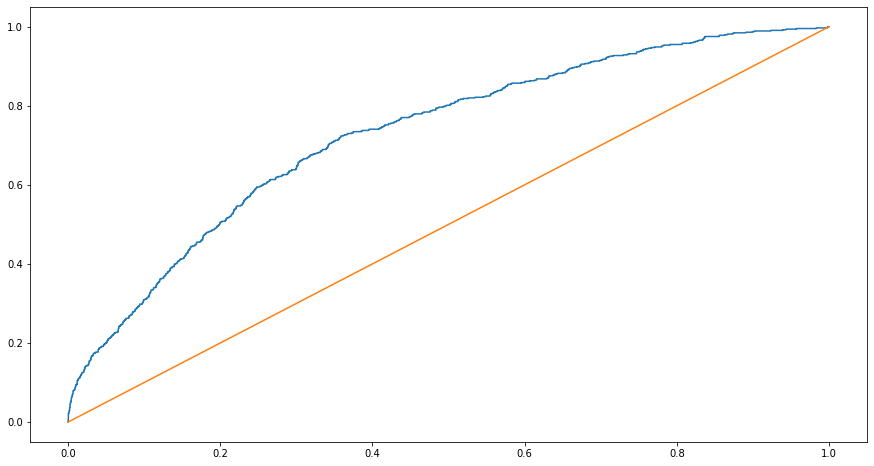

In [185]:
plt.figure(figsize=(15,8))
fpr,tpr,threshold=roc_curve(prob['cvd5'],prob['probability'])
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.show()

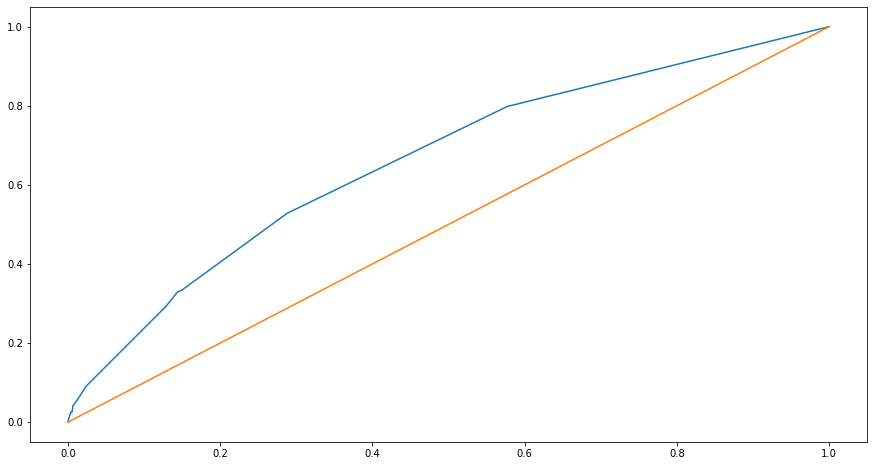

In [183]:
plt.figure(figsize=(15,8))
fpr,tpr,threshold=roc_curve(prob12['cvd'],prob12['probability'])
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [325]:
x=df1['heartRate']
y=df1['CVD']
xc=sm.add_constant(x)
model14=sm.Logit(y,xc).fit()
model14.summary()

Optimization terminated successfully.
         Current function value: 0.425719
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4238
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:               0.0005853
Time:                        20:48:11   Log-Likelihood:                -1805.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                    0.1459
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1104      0.272     -7.766      0.000      -2.643      -1.578
heartRate      0.0051      0.004      1.460      0.144      -0.002       0.012
==============================================================================
"""

In [326]:
from sklearn.metrics import roc_auc_score

prob14=model14.predict(xc)
prob14=df(prob14,columns=['prob'])
prob14['y']=y
prob14['y_est']=prob14['prob'].apply(lambda x:0 if x<0.5 else 1)
prob14.head()

print('AUC Score of model=',roc_auc_score(prob14['y'],prob14['y_est']))

AUC Score of model= 0.5


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [328]:
print('Cross entropy for the model:',log_loss(prob14['y'],prob14['y_est']))

Cross entropy for the model: 5.24598396186851


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [133]:
prob5=model5.predict(xc5)
prob5=df(prob5,columns=['prob'])
prob5['y']=y
prob5['y_est']=prob5['prob'].apply(lambda x : 0 if x<0.5 else 1)
print('Accuracy score of Model 5:',accuracy_score(prob5['y'],prob5['y_est']))
print('\nAccuracy score of Model 14:',accuracy_score(prob14['y'],prob14['y_est']))

Accuracy score of Model 5: 0.8542452830188679

Accuracy score of Model 14: 0.8481132075471698


As we can see that while comparing two models above, their accuracy score values are almost similar.
But model 14 has the higher accuracy while comparing with model 5.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [302]:
x=df1.drop('CVD',axis=1)
y=df1['CVD']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)



In [305]:
from sklearn.metrics import log_loss

print('Cross Entropy value:',log_loss(y_train,y_train_pred))

Cross Entropy value: 5.131945142760949


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [337]:
from sklearn.metrics import f1_score, confusion_matrix as cm

x=df1[['currentSmoker','cigsPerDay']]
y=df1['CVD']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)

In [335]:
cm(y_train,y_train_pred)

array([[2518,    0],
       [ 450,    0]], dtype=int64)

In [336]:
tn=2537
tp=0
fp=0
fn=431

print('Recall value:',(tp/(fn+tp)))
print('F1 score:',f1_score(y_train,y_train_pred))
#print('Precision:',(tp/(fp+tp)))

Recall value: 0.0
F1 score: 0.0


<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [316]:
x=df1.drop('CVD',axis=1)
y=df1['CVD']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_train_prob=lr.predict_proba(x_train)

print('Confusion matrix\n',cm(y_train,y_train_pred))
tn=2507
tp=26
fp=9
fn=426

ss= tn/(tn+fp)
sp= tp/(fn+tp)

y = (ss+sp)-1
print('\nYoudens Index:',y)

Confusion matrix
 [[2509   10]
 [ 422   27]]

Youdens Index: 0.053945017375522264


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# type your code here